In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
len(gpus)

0

In [5]:
cpu = tf.config.experimental.list_physical_devices('CPU')

In [6]:
cpu

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
# dodgy images

In [12]:
import cv2
import imghdr

In [10]:
data_dir = 'datasets'


In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [17]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in exts")
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))
        

harry
hermoine
RON


In [14]:
for image_class in os.listdir(data_dir):
    print(image_class)

harry
hermoine
RON


In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        print(image)

1480508469-harry-potter-in-90-minutes-1480436463.jpg
150401-tv-feature-harry-potter-image1-vpdnsqfrou.jpg
16870061670094.jpg
1E1h584wsncklUnSfOmfK_w.png
200px-HarryBlood.jpg
2087355-936full_harry_potter_and_the_goblet_of_fire_screenshot.jpg
220px-P_Harry_Potter-icon.svg.png
300px-Harry-Potter-PNG-Background.png
3189716-47.jpg
3fc542812dba415d446dabec3f697627b0-08-harry-potter.2x.h473.w710.jpg
4846d556747cece77e420a781752f3cf.png
4MTItMDhiOGVmZmIwOWMxXkEyXkFqcGdeQXVyNzU1NzE3NTg._V1_QL75_UX500_CR047500281_.jpg
56ffe5a04964cca4e534403a102924b3.jpg
750x513_PBH-poster_web.jpg
a-8-harry-potter-harry.jpg
a-8-harry-potter-harry_3x4.jpg
a-8-harry-potter-ron-harry_3x2.jpg
a5b93ad9c2f8b346c8ebee69e11b036d.jpg
Daniel-Radcliffe-Harry-Potter-and-the-Philosophers.jpg
daniel-radcliffe-harry-potter-movies.jpg
Daniel-Radcliffe-in-the-Epilogue-of-Harry-Potter-and-the-Deathly-Hallows.jpg
Daniel-Radcliffe-Rupert-Grint-Emma-Watson-Harry.jpg
Daniel_Radcliffe_SDCC_2014.jpg
famous-harry-potter-quote.png
fUbaMu

In [19]:
# load the datasets

In [20]:
import numpy as np
from matplotlib import pyplot as plt 

In [22]:
data = tf.keras.utils.image_dataset_from_directory('datasets')

Found 248 files belonging to 3 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [38]:
batch = data_iterator.next()

In [26]:
len(batch)
# images and labels

2

In [30]:
batch[0].shape

(32, 256, 256, 3)

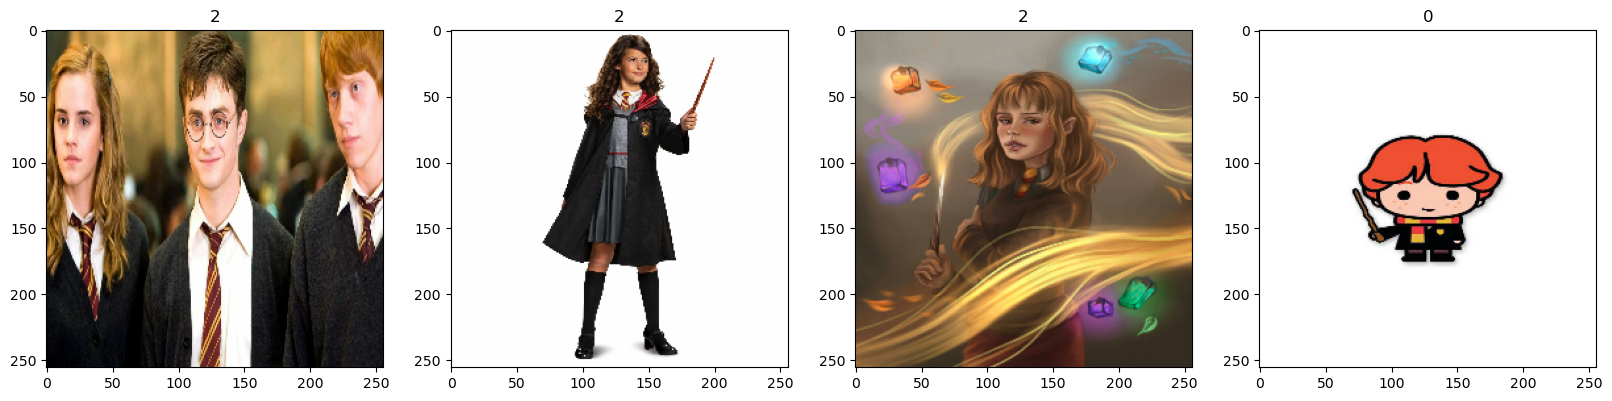

In [39]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [40]:
# ron : 0
# harry : 1
# hermoine : 2

In [41]:
# preprocessing the data

In [42]:
data = data.map(lambda x,y : (x/255, y))

In [46]:
data.as_numpy_iterator().next()[0].min()

0.0

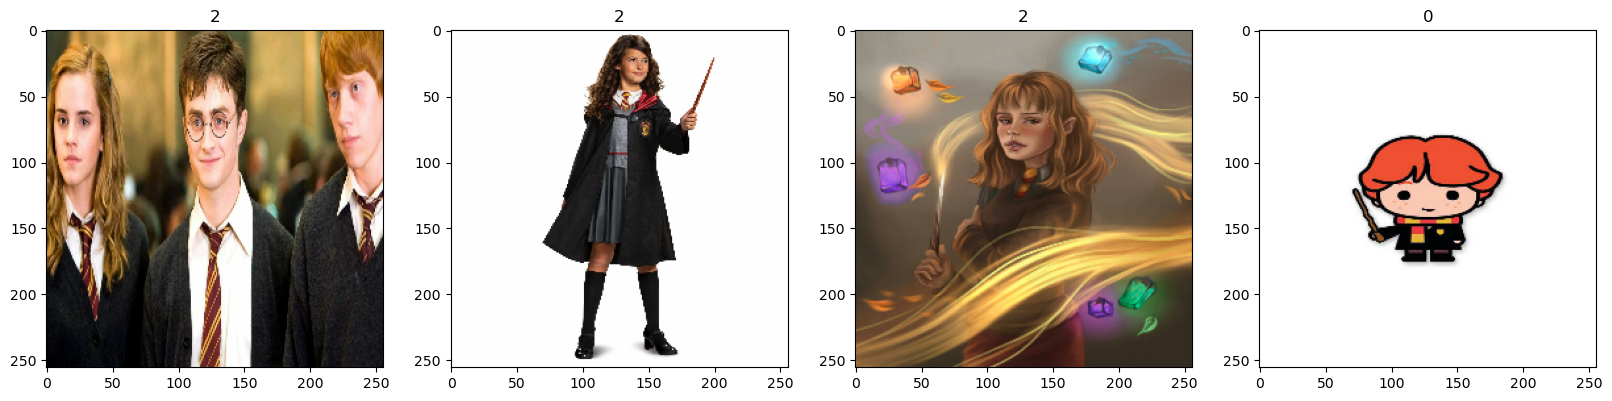

In [47]:
fig, ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [48]:
# splitting the dataset

In [75]:
len(data)

8

In [77]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)


In [78]:
train_size+test_size+val_size

6

In [79]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [90]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [80]:
# building a eep learning model

In [81]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten , Dropout

In [82]:
model = Sequential()

In [101]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Example of dropout for regularization
model.add(Dense(3, activation='softmax'))


In [108]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 64)       

In [110]:
logdir = 'logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 8s 2s/step - loss: 1.9563 - accuracy: 0.4297 - val_loss: 1.3668 - val_accuracy: 0.3125
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 1.1670 - accuracy: 0.3828 - val_loss: 1.0311 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 7s 1s/step - loss: 1.0700 - accuracy: 0.4375 - val_loss: 1.0331 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 7s 1s/step - loss: 1.0142 - accuracy: 0.7109 - val_loss: 0.9471 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.9735 - accuracy: 0.4766 - val_loss: 0.8552 - val_accuracy: 0.5312
Epoch 6/20
4/4 [==============================] - 10s 2s/step - loss: 0.8649 - accuracy: 0.6641 - val_loss: 0.8001 - val_accuracy: 0.6250
Epoch 7/20
4/4 [==============================] - 11s 2s/step - loss: 0.7959 - accuracy: 0.7266 - val_loss: 0.6480 - val_accuracy: 0.9062
Epoch 8/20
4/4 [==============================] - 

In [113]:
# ploting our accuracy 

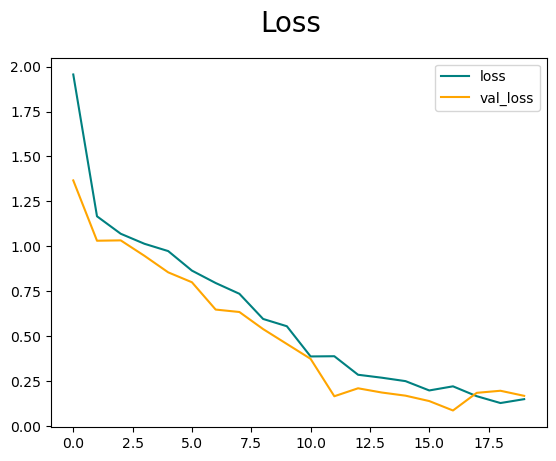

In [115]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

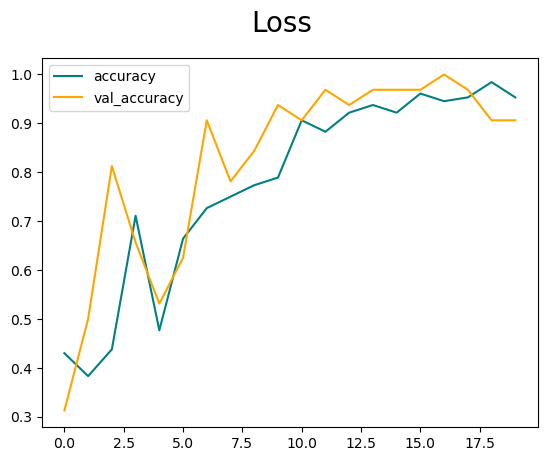

In [116]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [117]:
# evaluation

In [121]:
# test

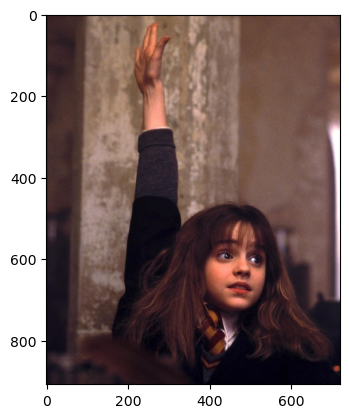

In [137]:
import cv2
img = cv2.imread('tesT_her.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

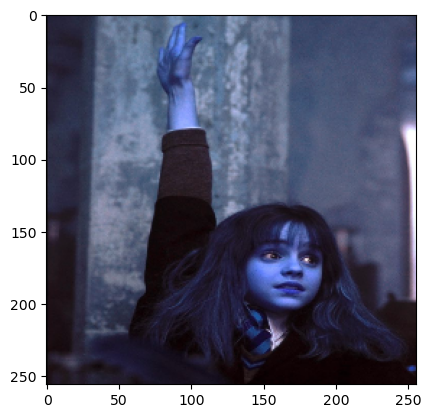

In [138]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [139]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [140]:
yhat[0]

array([0.11828197, 0.4266858 , 0.45503232], dtype=float32)

In [141]:
max_index = np.argmax(yhat[0])
print(max_index)

2


In [150]:
def predictionImage(img_path):
    img = cv2.imread(img_path)
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    print(yhat)
    max_index = np.argmax(yhat[0])
    if max_index == 0:
        print("RON")
    elif max_index == 1:
        print("Harry Potter")
    elif max_index == 2:
        print("Hermoine")
    else:
        print("Error")

TESTING

In [151]:
predictionImage('tesT_her.jpeg')

1/1 [==============================] - 0s 30ms/step
[[0.11828197 0.4266858  0.45503232]]
Hermoine


In [152]:
predictionImage('harr.jpg')

1/1 [==============================] - 0s 38ms/step
[[0.0062217  0.99156296 0.00221531]]
Harry Potter


In [155]:
predictionImage('ron.jpg')

1/1 [==============================] - 0s 42ms/step
[[0.6706949  0.31129977 0.01800538]]
RON


In [156]:
# saving the model

In [157]:
from tensorflow.keras.models import load_model

In [158]:
model.save(os.path.join('models', 'golden_trio.h5'))

c:\Users\Shivam\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
